## Imports and setup

In [1]:
# ---------------------------- Imports ---------------------------------
import os
import sys
import time
import numpy as np
import pandas as pd

# Include local module path
sys.path.append('/Users/nassirmohammad/projects/clustering')

In [2]:
# Data generation utilities
from data.synthetic.one_dim_data import generate_clustering_1d_data
from data.synthetic.one_dim_data_gauss import generate_clustering_1d_gauss_anomalies
from data.synthetic.two_dim_data_gauss import generate_clustering_2d_gauss_data

# clustering method 
from clustering_methods import novel_clustering

# Plotting tools
from utilities.plotting import plot_clusters

## Generate synthetic data or read in data with a tiny amount of labelled data

Number of unlabelled examples: 29998
Number of labelled examples: 30
Percentage of labelled data: 0.1%


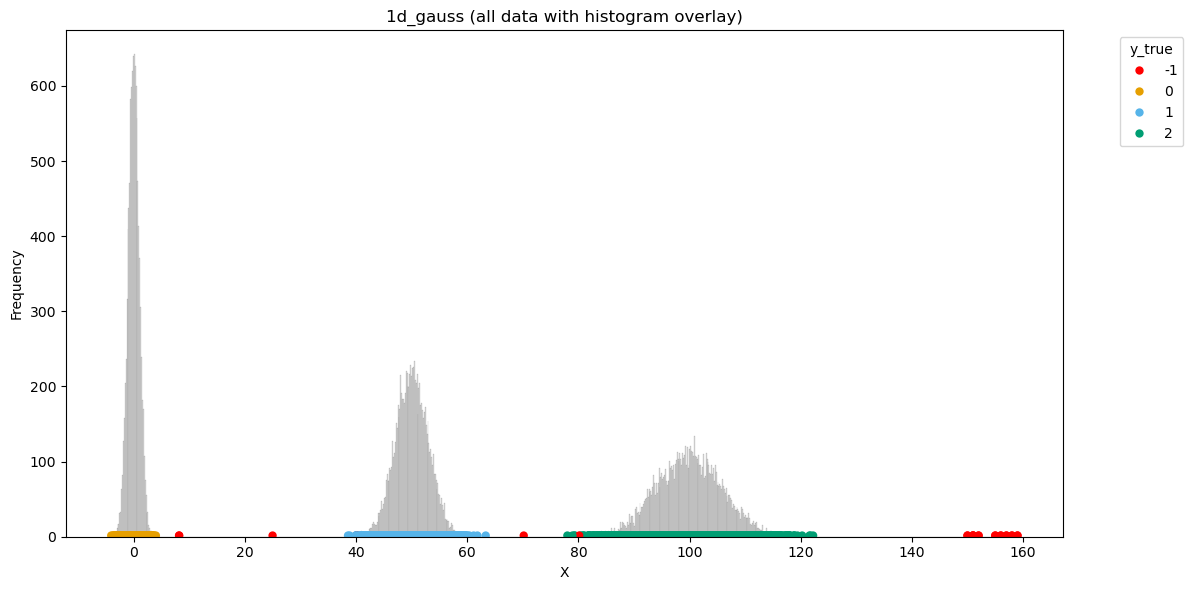

In [3]:
# ---------------------------- Data Setup ---------------------------------

# Define dataset mode
mode = "1d_gauss"  # Options: "1d_simple", "1d_gauss", "2d_gauss"
k = None  # Number of clusters (used by some algorithms like k-means, we supply ground truth number)

# Load selected dataset and plot
if mode == "1d_simple":
    k = 3
    df = generate_clustering_1d_data(repeat_const=100, percent_labelled=0.03, random_state=None)

elif mode == "1d_gauss":
    k = 3
    df = generate_clustering_1d_gauss_anomalies(random_seed=42,
                                               labelled_percent=0.1,
                                               cluster_params=[(0, 1), (50, 3), (100, 6)],
                                               samples_per_cluster=10000,
                                               include_anomaly_cluster=True,
                                               )

elif mode == "2d_gauss":
    k=5
    df = generate_clustering_2d_gauss_data(n_samples=10000,
                                        n_components=k,
                                        num_features=2,
                                        rand_seed=0,
                                        same_density=False,
                                        labelled_fraction=0.01,
                                        add_anomaly_cluster=True,
                                        plot=True,
                                        )

# Extract feature columns from the DataFrame
feature_columns = [col for col in df.columns if col not in {'y_true', 'y_live'}]

# assign the dataset name
dataset_name = mode

plot_clusters(df, feature_columns, label_column='y_true', title=dataset_name + ' (all data with histogram overlay)', show_seeds_only=False);

In [4]:
df

,X,y_true,y_live
0,96.414204,2,-1
1,51.848964,1,-1
2,53.169931,1,-1
3,92.841919,2,-1
4,96.619946,2,-1
...,...,...,...
30023,156.000000,-1,-1
30024,157.000000,-1,-1
30025,158.000000,-1,-1
30026,159.000000,-1,-1


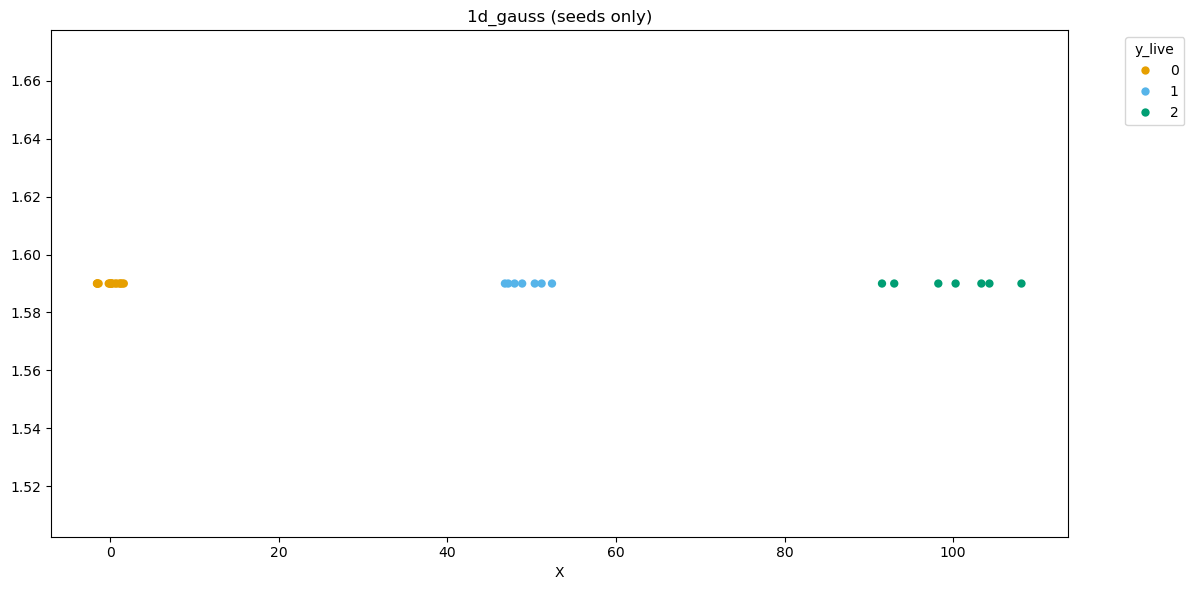

In [5]:
plot_clusters(df, feature_columns, label_column='y_live', title=dataset_name + ' (seeds only)', show_seeds_only=True)

## Run novel clustering method

In [6]:
# run the novel clustering algorithm
# ensure dataframe has 'y_live' column of partially labelled data for semi-supervised clustering
df_novel = novel_clustering(df, feature_columns, seeds='y_live')

1
2
3
4
5
6
7
8
9
10
11
12
13


In [7]:
df_novel

,X,y_true,y_live,novel_method
0,96.414204,2,-1,2
1,51.848964,1,-1,1
2,53.169931,1,-1,1
3,92.841919,2,-1,2
4,96.619946,2,-1,2
...,...,...,...,...
30023,156.000000,-1,-1,-1
30024,157.000000,-1,-1,-1
30025,158.000000,-1,-1,-1
30026,159.000000,-1,-1,-1


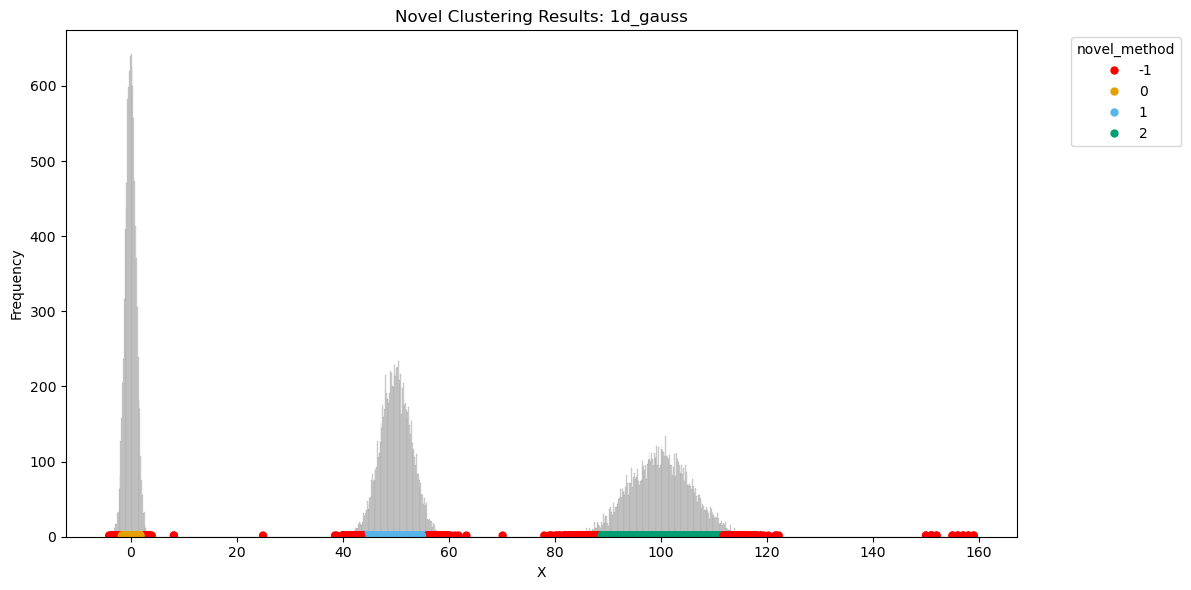

In [8]:
plot_clusters(df, feature_columns, label_column='novel_method', title="Novel Clustering Results: " + dataset_name, show_seeds_only=False);

In [9]:
# seeded_k_means_clustering(df, feature_columns, target_column='y_true', seeds='y_live', n_clusters=3, random_state=0, remap_labels=False